In [1]:
import numpy as np
import matplotlib.pyplot as plt
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits as pf
from astropy.modeling import models, fitting
from scipy.ndimage import filters

In [2]:
infile1 = '../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits'
infile2 = '../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits'

In [3]:
spec1 = spec2d.Spec2d(infile1, hext=12, xtrim=[40, 170])
spec2 = spec2d.Spec2d(infile2, hext=12, xtrim=[40, 170])


Loading file ../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits (HDU=12)
The input dataset was trimmed
 xrange: 40:171.  yrange: 0:4096
Final data dimensions (x y): 131 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 131


Loading file ../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/lris-longslit-red-1120/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits (HDU=12)
The input dataset was trimmed
 xrange: 40:171.  yrange: 0:4096
Final data dimensions (x y): 131 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 131



In [4]:
spec1.set_dispaxis('y')
spec2.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096



Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




In [5]:
spec1.subtract_sky_2d(use_skymod=True)
spec2.subtract_sky_2d(use_skymod=True)


pypeit generated sky model will be used for sky subtraction

 Wrote sky subtracted data to None

From this point sky subtracted data will be used
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


pypeit generated sky model will be used for sky subtraction

 Wrote sky subtracted data to None

From this point sky subtracted data will be used
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00



In [ ]:
#spec1.szap(outfile='szap30.fits', use_skymod=True)

In [ ]:
flt1 = spec1.data - filters.median_filter(spec1.data, 7)
flt2 = spec2.data - filters.median_filter(spec2.data, 7)

In [ ]:
pf.PrimaryHDU(flt2.T).writeto('flt22.fits')

In [ ]:
up1 = spec1.data[:, 105:]
dw1 = spec1.data[:, :50]
up2 = spec2.data[:, 105:]
dw2 = spec2.data[:, :50]

In [ ]:
sp_1 = spec1.data   #[:, 55:105]
sp_2 = spec2.data   #[:, 55:105]
sp_1.flatten().shape

In [ ]:
pf.PrimaryHDU(sp_1.T).writeto('sp1.fits')

In [6]:
s1 =  spec1.data[:, :20]
s2 =  spec2.data[:, :20]

<IPython.core.display.Javascript object>


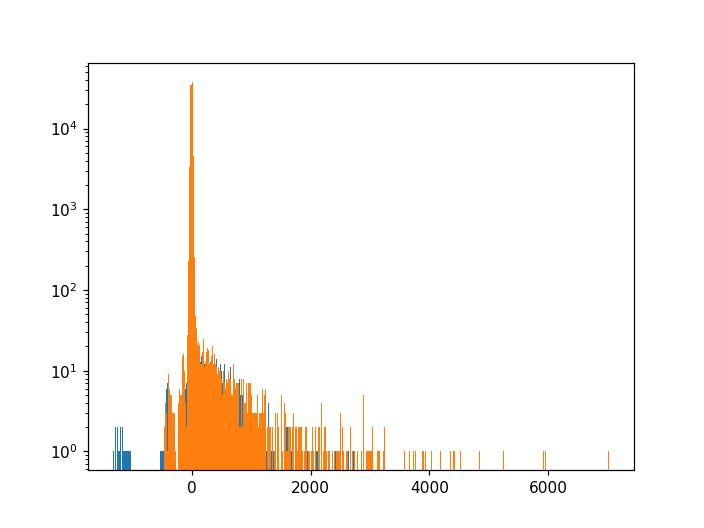

In [13]:
%matplotlib notebook
count, bins, patch= plt.hist(s1.flatten(), bins=400)
counts, bins1, patch = plt.hist(s2.flatten(), bins=400)
#bins2= plt.hist(sp2.flatten(), bins=250)
#bins = plt.hist((sp2-sp1).flatten(), bins=200)
plt.yscale('log')
#print(count)
#print(counts)

In [14]:
sum =0
cnt = 0
for i, p in enumerate(counts):
    #print(i)
    if p > cnt:
        cnt = p
        max_bin = bins1[i+1]
    sum += p
    if sum/s1.flatten().shape[0] > 0.95:
        br = bins1[i+1]
        break  
br

32.600384

In [15]:
max_bin

13.8664465

In [ ]:
sp_1 = flt1[:, 55:105]
sp_2 = flt2[:, 55:105]

In [ ]:
mask = np.zeros(sp_2.shape, dtype=bool)

for k in range(0, sp_2.shape[0], 400):
    for i in range(0, sp_2.shape[1], 5):
        sp1 = sp_2[k:k+400, i:i+5]
        sp2 = sp_1[k:k+400, i:i+5]
        count1, bins1 = np.histogram(sp1.flatten(), bins=250)
        count2, bins2 = np.histogram(sp2.flatten(), bins=250)
        sm1 = 0
        sm2 = 0
        tot_pix =sp1.flatten().shape[0]

        for j,p in enumerate(count1):
            sm1 += p
            if sm1/tot_pix > 0.95 :
                border1 = bins1[j+1]
                break
        #print(border)
        for j,p in enumerate(count2):
            sm2 += p
            if sm2/tot_pix > 0.95 :
                border2 = bins2[j+1]
                break

        a = np.where(sp1>border1)
        a =np.transpose(a)

        for j, p in enumerate(a):

            #print(sp2[p[0]][p[1]])
            if sp2[p[0]][p[1]] >0 :
                #pass 
                if sp1[p[0]][p[1]] > (sp2[p[0]][p[1]] + 0.5*border2) :
                    mask[k+p[0]][i+p[1]] =1 
            else:
                if sp1[p[0]][p[1]] > 3*border1 :
                    mask[k+p[0]][i+p[1]] =1

In [ ]:
m = sp1 < 856
np.sum(m)/tot_pix

In [ ]:
a = np.where(sp1>border)
mask = np.zeros(sp1.shape, dtype=bool)
a =np.transpose(a)
for i, p in enumerate(a):
    
    #print(sp2[p[0]][p[1]])
    if sp2[p[0]][p[1]] >0 :
        #pass 
        if sp1[p[0]][p[1]] > (sp2[p[0]][p[1]] + 250) :
            mask[p[0]][p[1]] =1 
    else:
        if sp1[p[0]][p[1]] > border + 300 :
            mask[p[0]][p[1]] =1 
    
    #print(p)
    #pass
#a[0]
#mask[0][0] = 1
np.where(mask)

In [ ]:
sp_2[mask] = -50000

In [ ]:
pf.PrimaryHDU(sp_2.T).writeto('sp2_full_new.fits')

In [ ]:
m = sp_1 == -50000
sp_1[m] = sp_2[m]

In [ ]:
pf.PrimaryHDU(sp_1.T).writeto('sp1_fill.fits')

In [ ]:
bins1= plt.hist(dw1.flatten(), bins=100)
bins2= plt.hist(dw2.flatten(), bins=100)
plt.yscale('log')

In [ ]:
dw1.flatten().tolist().index(np.min(dw1))/4096

In [ ]:
m_pos = up1 > 50.0
np.sum(1*m_pos)

In [ ]:
mup1 = up1 > (up2 + 30.0)
mdw1 = dw1 > (dw2 + 30.0)
mup2 = up2 > (up1 + 30.0)
mdw2 = dw2 > (dw1 + 30.0)

up1[mup1] = up2[mup1]  #np.minimum(up1, up2)
dw1[mdw1] = dw2[mdw1] #np.minimum(dw1, dw2) 
up2[mup2] = up1[mup2] #np.minimum(up1, up2)
dw2[mdw2] = dw1[mdw2]   #np.minimum(dw1, dw2)

In [ ]:
spec1.data[:, 105:] = up1
spec1.data[:, :50]  = dw1
spec2.data[:, 105:] = up2
spec2.data[:, :50]  = dw2

In [ ]:
diff1 = spec1.data
diff2 = spec2.data

In [ ]:
pf.PrimaryHDU(diff1.T).writeto('diff1.fits')
pf.PrimaryHDU(diff2.T).writeto('diff2.fits')

In [ ]:
d1 = spec1.data[:190, 60:95]
d2 = spec2.data[:190, 60:95]

In [ ]:
d1.flatten().shape

In [ ]:
%matplotlib notebook
bins1= plt.hist(d1.flatten(), bins=100)
bins2= plt.hist(d2.flatten(), bins=100)
#bins, count, patch= plt.hist(diff.flatten(), bins=200)
plt.yscale('log')

In [ ]:
diff = d1 - d2

In [ ]:
m1 = diff < 1050.0
m2 = diff >-1050

m = m1 & m2
np.sum(1*m) 

In [ ]:
m0 = d1 > 0.0
m1 = d1 > (d2 + 30)

mm = m0 & m1

m2 =  d1 < (d2-30)
mn = ~m0 & m2
#m2 = d2 > (d1 + 500)

d1[m1] = 5000   #d2[m1]
#d2[m2] = 5000  #d2[m2]

In [ ]:
pf.PrimaryHDU(d1.T).writeto('d1.fits')
#pf.PrimaryHDU(d2.T).writeto('d2.fits')

In [ ]:
d1.flatten().shape

In [ ]:
diff = spec1.data - spec2.data
#pf.PrimaryHDU(diff.T).writeto('diff1.fits')

In [ ]:
gauss = models.Gaussian1D(amplitude=110, mean=0, stddev=500)

In [ ]:
%matplotlib notebook
bins1= plt.hist(spec1.data.flatten(), bins=1000)
bins2= plt.hist(spec2.data.flatten(), bins=1000)
bins, count, patch= plt.hist(diff.flatten(), bins=1000)

x = np.zeros(len(count))
for i, p in enumerate(bins[:-1]):
    x[i] = 0.5*(p + bins[i+1])     # p + 0.5(bins[i+1]) - p)

#plt.plot(x, gauss(x), color='r', label='Gaussian')
#plt.yscale('log')
plt.yscale('log')
plt.ylim(5*10**-1, 2*10**3)

In [ ]:
diff_md = filters.median_filter(diff, 10)

In [ ]:
mask1 = diff_md < -30 
mask2 = diff_md > 30

mask = mask1 | mask2

In [ ]:
np.sum(1*mask)

In [ ]:
diff[mask] = 3000.0

In [ ]:
pf.PrimaryHDU(diff.T).writeto('diff2.fits')

In [ ]:
bins= plt.hist(spec1.data_org.flatten(), bins=1000)
bins1= plt.hist(spec1.data.flatten(), bins=1000)
plt.yscale('log')

In [ ]:
m1 = spec1.data < 0.0
m2 = spec2.data < 0.0

print(np.sum(1*m1)/ spec1.data.flatten().shape[0])
print(np.sum(1*m2)/ spec2.data.flatten().shape[0])

In [ ]:
spec1.data.flatten().shape[0]

In [ ]:
x = np.zeros(len(count))
for i, p in enumerate(bins[:-1]):
    x[i] = 0.5*(p + bins[i+1])     # p + 0.5(bins[i+1]) - p)

x1 = x[530:566] - np.median(x[530:566])
y1 = count[530:566] / np.median(count[530:566])
y1 = y1 - np.min(y1)

In [ ]:
best_fit_gauss = fitter_gauss(model_gauss, x1, y1)

In [ ]:
plt.plot(x1, best_fit_gauss(x1), 'r', label='Gaussian fit')

In [ ]:
np.arange(-5, 5)

In [ ]:
#count, bins, patch = plt.hist(diff.flatten(), bins=1000)
plt.plot(x[530:566], best_fit_gauss(x[530:566]), 'r', label='Gaussian fit')
plt.yscale('log')
plt.legend()

In [ ]:
#gauss = models.Gaussian1D(amplitude=1200, mean=0, stddev=7)
model_gauss = models.Gaussian1D()        
fitter_gauss = fitting.LevMarLSQFitter()

In [ ]:
plt.plot(x1, y1, '.')
plt.plot(x1, best_fit_gauss(x1), 'r', label='Gaussian fit')
#plt.yscale('log')

In [ ]:
print(best_fit_gauss)

In [ ]:
x[0:50]

In [ ]:
np.std(diff.flatten())

In [ ]:
a = np.array([9, 7, 6 , 7 , 0 , 3, 2])

In [ ]:
b = a>3

In [ ]:
a[b]= -9

In [ ]:
a

In [ ]:
np.median(diff)

In [ ]:
np.max(diff)

In [ ]:
a = np.array([4, 6, 7, 9, 8])
b = np.array([0,-3,0])
m = b==0

In [ ]:
a[:3][m] = 10

In [ ]:
a